# Bangalore House Price

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("bengaluru_house_prices.csv")

In [5]:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape

(13320, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
df.drop(["area_type","availability","society"], axis = 1, inplace = True)

In [9]:
df.head(1)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07


In [10]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
#sns.heatmap(df.isnull(), annot=True)

In [12]:
# as no of NAN present in "size columns" are less, dropping NAN makes no big change

In [13]:
df.dropna(subset = ["size"], inplace = True)

In [14]:
df.shape

(13304, 6)

In [15]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df["bhk"] = df["size"].apply(lambda x: int(x.split(" ")[0]))

In [17]:
df["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [18]:
# Some rows with bedroom/BHK have very less sqft area compared to others, hence dropping those rows as invalid entries

In [19]:
df1 = df[(df["bhk"] != 14) & (df["bhk"] != 18) & (df["bhk"] != 19) & (df["bhk"] != 43)]

In [20]:
df1.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 16, 12, 13],
      dtype=int64)

In [21]:
# filling NAN values of bathrooms with same value as bhk has 

In [22]:
df1["bath"] = df1["bath"].fillna(value = df1["bhk"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df1.bath.unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9.,  8.,  7., 11., 10., 14., 27.,
       12., 16., 13.])

In [24]:
df1["bath"] = df1["bath"].astype("int32")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df1["balcony"] = df1["balcony"].fillna(value = (df["bhk"]-1)).astype("int32")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df1.dropna(inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [28]:
df1["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [29]:
df2 = df1.copy()

In [30]:
def conv(x):
    
    if "-" in x:
        token = x.split("-")
        return (float(token[0]) + float(token[1]))//2
    elif "Sq" in x:
        token1 = x.split("Sq")[0]
        return (float(token1))*10.76
    try:
        return float(x)
    except:
        return None

In [31]:
df2["total_sqft"] = df2["total_sqft"].apply(conv)

In [32]:
df2.dropna(inplace = True)

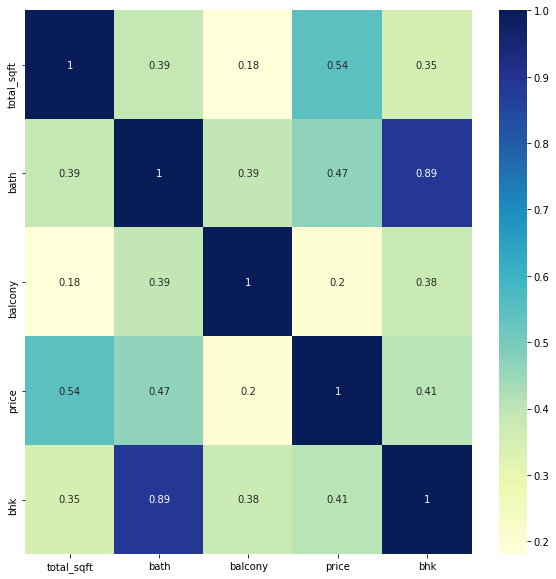

In [33]:
plt.figure(figsize = (10,10))
sns.heatmap(df2.corr(), annot = True, cmap = "YlGnBu")

In [34]:
df3 = df2.copy()

In [35]:
# Finding "Price per sqft" will help to find the ouliers

In [36]:
df3["price_per_sqft"] = (df3["price"]*100000)/df3["total_sqft"]

In [37]:
df3["price_per_sqft"].describe()

count    1.328500e+04
mean     7.909087e+03
std      1.063874e+05
min      2.678298e+02
25%      4.266667e+03
50%      5.434783e+03
75%      7.313109e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

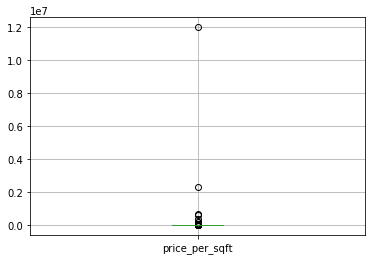

In [38]:
df3.boxplot(["price_per_sqft"])

In [39]:
df3["price_per_sqft"].quantile(0.10)

3500.000000000001

In [40]:
df3["price_per_sqft"].quantile(0.85)

9299.344593351903

In [41]:
df3 = df3[~((df3["price_per_sqft"]>(df3["price_per_sqft"].quantile(0.9))) | (df3["price_per_sqft"]<(df3["price_per_sqft"].quantile(0.1))))]

In [42]:
df3.shape

(10626, 8)

In [43]:
df3["price_per_sqft"].describe()

count    10626.000000
mean      5858.378194
std       1788.710386
min       3500.218055
25%       4499.051573
50%       5434.782609
75%       6779.256503
max      11587.982833
Name: price_per_sqft, dtype: float64

In [44]:
df4 = df3.copy()

In [45]:
df4["location"] = df4["location"].apply(lambda x: x.strip())

In [46]:
temp = df4["location"].value_counts()[df4["location"].value_counts()<=10]

In [47]:
temp

Kalkere                   10
Ganga Nagar               10
Basaveshwara Nagar        10
Shivaji Nagar             10
Mico Layout               10
                          ..
6th Block Rajaji Nagar     1
kadubisnahalli             1
Srigandada Kaval           1
Bettadasanapura            1
Akash Nagar                1
Name: location, Length: 898, dtype: int64

In [48]:
df4["location"] = df4["location"].apply(lambda x: "other" if x in temp else x)

In [49]:
df4.head(20)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,1,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,3,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,3,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,1,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,1,51.00,2,4250.000000
6,Old Airport Road,4 BHK,2732.0,4,3,204.00,4,7467.057101
8,Marathahalli,3 BHK,1310.0,3,1,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2,2,70.00,3,3888.888889
11,Whitefield,4 Bedroom,2785.0,5,3,295.00,4,10592.459605
12,7th Phase JP Nagar,2 BHK,1000.0,2,1,38.00,2,3800.000000


In [50]:
df5 = df4[~(df4["bath"]>df4["bhk"]+2)]

In [51]:
df5.drop("size", axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
df5.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,1,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,3,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,3,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,1,95.00,3,6245.890861
4,Kothanur,1200.0,2,1,51.00,2,4250.000000


In [53]:
df5.price.describe()

count    10621.000000
mean        93.230566
std         73.578913
min         13.500000
25%         53.000000
50%         71.000000
75%        108.000000
max       2100.000000
Name: price, dtype: float64

In [54]:
ohe = pd.get_dummies(df5.location, drop_first=True)

In [55]:
ohe.to_csv("ohe.csv")

In [56]:
df6 = pd.concat([df5,ohe],axis = 1)

In [57]:
df6.drop(["location","price_per_sqft"], axis=1, inplace = True)

In [58]:
df5.to_csv("mod.csv")

In [59]:
X = df6.drop("price", axis = 1)
y = df6["price"]

In [60]:
X.head()

,total_sqft,bath,balcony,bhk,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5,3,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Std scaling

In [62]:
#from sklearn.preprocessing import MinMaxScaler

In [63]:
#std = MinMaxScaler()
#scaled = ["total_sqft","bath","balcony","bhk"]
#X[scaled] = std.fit_transform(X[scaled])

In [64]:
#X.head()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

# Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lin = LinearRegression(normalize=True)
lin.fit(X_train,y_train)
yp2 = lin.predict(X_test)

In [73]:
lin.predict([list(X.iloc[3,:])])

array([97.70449501])

In [74]:
y[3]

95.0

In [92]:
print(metrics.mean_absolute_error(y_test, yp2))
print(metrics.mean_squared_error(y_test,yp2))
print(np.sqrt(metrics.mean_squared_error(y_test,yp2)))
print(metrics.r2_score(y_test, yp2))

20.15405084010139
1005.3500074856229
31.7072548084129
0.8281477636585984


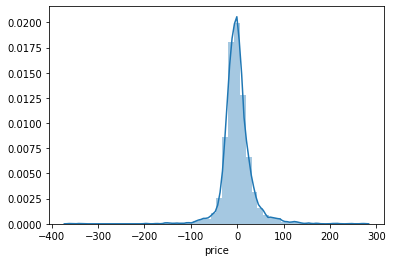

In [93]:
sns.distplot(y_test-yp2)

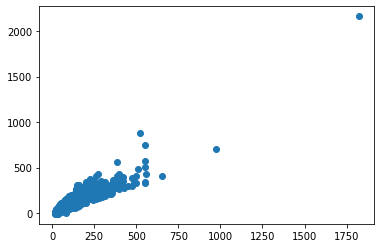

In [94]:
plt.scatter(y_test,yp2)

In [95]:
import pickle

In [96]:
pickle.dump(lin,open("BangaloreHousePrice.pkl", "wb"))

In [97]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))